In [92]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../Data/Speed Dating Data.csv', encoding = "ISO-8859-1", engine='python')
pd.set_option("display.max_columns", None)
data

,iid,id,gender,idg,condtn,wave,Number of people met,station met,start station,order,partner,pid,match,interest level,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,Unnamed: 195
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0

In [2]:
#counting how many people participated per wave
participants_wave = data.groupby(['gender','wave']).agg({'iid':pd.Series.nunique})

participants_wave

iid
gender wave     
0      1      10
       2      19
       3      10
       4      18
       5       9
       6       5
       7      16
       8      10
       9      20
       10      9
       11     21
       12     14
       13     10
       14     20
       15     18
       16      6
       17     10
       18      6
       19     15
       20      6
       21     22
1      1      10
       2      16
       3      10
       4      18
       5      10
       6       5
       7      16
       8      10
       9      20
       10      9
       11     21
       12     14
       13      9
       14     18
       15     19
       16      8
       17     14
       18      6
       19     15
       20      7
       21     22

In [3]:
#filtering for people who gave themselves an attractiveness rating.
selfrating = data.groupby(['gender','iid','attr5_1']).max()
selfrating

id  idg  condtn  wave  Number of people met  \
gender iid attr5_1                                                  
0      234 9.0       1.0    1       1    10                     9   
       235 6.0       2.0    3       1    10                     9   
       236 8.0       3.0    5       1    10                     9   
       237 8.0       4.0    7       1    10                     9   
       238 9.0       5.0    9       1    10                     9   
...                  ...  ...     ...   ...                   ...   
1      548 10.0     18.0   36       2    21                    22   
       549 7.0      19.0   38       2    21                    22   
       550 7.0      20.0   40       2    21                    22   
       551 7.0      21.0   42       2    21                    22   
       552 9.0      22.0   44       2    21                    22   

                    station met  start station  order  partner    pid  match  \
gender iid attr5_1                                                             
0      234 9.0                8            8.0      9        9  251.0      0   
       235 6.0                1            1.0      9        9  251.0      1   
       236 8.0                2            2.0      9        9  251.0      0   
       237 8.0                3            3.0      9        9  251.0      1   
       238 9.0                7            7.0      9        9  251.0      1   
...                         ...            ...    ...      ...    ...    ...   
1      548 10.0              22            9.0     22       22  530.0      1   
       549 7.0               22            7.0     22       22  530.0      1   
       550 7.0               22           20.0     22       22  530.0      1   
       551 7.0               22           21.0     22       22  530.0      1   
       552 9.0               22           10.0     22       22  530.0      1   

                    interest level  samerace  age_o  race_o  pf_o_att  \
gender iid attr5_1                                                      
0      234 9.0                0.66         1   33.0     6.0      35.0   
       235 6.0                0.65         1   33.0     6.0      35.0   
       236 8.0                0.47         1   33.0     6.0      35.0   
       237 8.0                0.73         1   33.0     6.0      35.0   
       238 9.0                0.81         1   33.0     6.0      35.0   
...                            ...       ...    ...     ...       ...   
1      548 10.0               0.48         1   30.0     6.0      58.0   
       549 7.0                0.49         1   30.0     6.0      58.0   
       550 7.0                0.74         1   30.0     6.0      58.0   
       551 7.0                0.62         0   30.0     6.0      58.0   
       552 9.0                0.83         1   30.0     6.0      58.0   

                    pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  \
gender iid attr5_1                                                            
0      234 9.0          30.0      30.0      25.0      19.0      25.0      1   
       235 6.0          30.0      30.0      25.0      19.0      25.0      1   
       236 8.0          30.0      30.0      25.0      19.0      25.0      1   
       237 8.0          30.0      30.0      25.0      19.0      25.0      1   
       238 9.0          30.0      30.0      25.0      19.0      25.0      1   
...                      ...       ...       ...       ...       ...    ...   
1      548 10.0         30.0      30.0      30.0      15.0      30.0      1   
       549 7.0          30.0      30.0      30.0      15.0      30.0      1   
       550 7.0          30.0      30.0      30.0      15.0      30.0      1   
       551 7.0          30.0      30.0      30.0      15.0      30.0      1   
       552 9.0          30.0      30.0      30.0      15.0      30.0      1   

                    attr_o  sinc_o  intel_o  fun_o  amb_o  shar_o  like_o  \
gender iid attr5_1          

In [10]:
#count of people who rated themselves by gender
#female = 0
#male = 1
gender_rating = selfrating.groupby('gender')['id'].count()

gender_rating

gender
0    155
1    159
Name: id, dtype: int64

In [11]:
#picking out a specific contestant who has a rating of their attractiveness level
c_234 = data.loc[data['iid'] == 234]

c_234

,iid,id,gender,idg,condtn,wave,Number of people met,station met,start station,order,partner,pid,match,interest level,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,Unnamed: 195
3408,234,1.0,0,1,1,10,9,8,8.0,7,1,243.0,0,0.43,0,27.0,2.0,20.0,20.0,20.0,25.0,5.0,10.0,1,6.0,9.0,7.0,7.0,8.0,NaN,7.0,7.0,2.0,22.0,Sociology and Education,3.0,George Mason University,1070.0,12696.0,6.0,1.0,5.0,Virginia,23060.0,44346.0,3.0,7.0,3.0,Educational Policy,2,5,3.0,10.0,10.0,9.0,5.0,2.0,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0,5.0,NaN,20.0,20.0,20.0,10.0,10.0,20.0,10.0,20.0,20.0,20.0,15.0,15.0,75.0,1.0,1.0,3.0,10.0,10.0,7.0,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,0,4.0,8.0,9.0,7.0,8.0,2.0,5.0,2.0,0.0,1.0,30.0,20.0,20.0,10.0,10.0,5.0,8.0,10.0,9.0,10.0,10.0,5.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,15.0,20.0,20.0,15.0,10.0,25.0,20.0,15.0,20.0,10.0,10.0,50.0,5.0,5.0,20.0,10.0,10.0,8.0,9.0,9.0,9.0,10.0,9.0,6.0,9.0,7.0,10.0,0.0,0.0,0.0,NaN,NaN,15.0,10.0,20.0,20.0,15.0,20.0,25.0,15.0,15.0,20.0,15.0,10.0,15.0,15.0,20.0,10.0,20.0,20.0,50.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,9.0,8.0,10.0,9.0,10.0,10.0,7.0,10.0,NaN
3409,234,1.0,0,1,1,10,9,8,8.0,4,2,244.0,0,0.46,0,28.0,2.0,20.0,20.0,20.0,10.0,10.0,20.0,0,6.0,8.0,9.0,8.0,9.0,3.0,3.0,2.0,2.0,22.0,Sociology and Education,3.0,George Mason University,1070.0,12696.0,6.0,1.0,5.0,Virginia,23060.0,44346.0,3.0,7.0,3.0,Educational Policy,2,5,3.0,10.0,10.0,9.0,5.0,2.0,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0,5.0,NaN,20.0,20.0,20.0,10.0,10.0,20.0,10.0,20.0,20.0,20.0,15.0,15.0,75.0,1.0,1.0,3.0,10.0,10.0,7.0,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,1,7.0,8.0,8.0,7.0,9.0,5.0,7.0,4.0,0.0,1.0,30.0,20.0,20.0,10.0,10.0,5.0,8.0,10.0,9.0,10.0,10.0,5.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,15.0,20.0,20.0,15.0,10.0,25.0,20.0,15.0,20.0,10.0,10.0,50.0,5.0,5.0,20.0,10.0,10.0,8.0,9.0,9.0,9.0,10.0,9.0,6.0,9.0,7.0,10.0,0.0,0.0,0.0,NaN,NaN,15.0,10.0,20.0,20.0,15.0,20.0,25.0,15.0,15.0,20.0,15.0,10.0,15.0,15.0,20.0,10.0,20.0,20.0,50.0,10.0,10.0,10.0,10.0,10.0,9.0,10.0,9.0,8.0,10.0,9.0,10.0,10.0,7.0,10.0,NaN
3410,234,1.0,0,1,1,10,9,8,8.0,6,3,245.0,0,0.05,0,32.0,2.0,18.0,10.0,30.0,10.0,10.0,22.0,1,8.0,7.0,6.0,6.0,NaN,5.0,7.0,3.0,2.0,22.0,Sociology and Education,3.0,George Mason University,1070.0,12696.0,6.0,1.0,5.0,Virginia,23060.0,44346.0,3.0,7.0,3.0,Educational Policy,2,5,3.0,10.0,10.0,9.0,5.0,2.0,1.0,4.0,9.0,5.0,6.0,5.0,5.0,9.0,7.0,4.0,5.0,NaN,20.0,20.0,20.0,10.0,10.0,20.0,10.0,20.0,20.0,20.0,15.0,15.0,75.0,1.0,1.0,3.0,10.0,10.0,7.0,7.0,8.0,8.0,10.0,9.0,6.0,9.0,6.0,10.0,0,4.0,6.0,10.0,6.0,6.0,7.0,6.0,2.0,0.0,1.0,30.0,20.0,20.0,10.0,10.0,5.0,8.0,10.0,9.0,10.0,10.0,5.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,15.0,20.0,20.0,15.0,10.0,25.0,20.0,15.0,20.0,10.0,10.0,50.0

In [48]:
intentions = data.copy(deep=True)

intentions.drop(intentions.iloc[:,7:45],axis = 1, inplace = True)

intentions_df = intentions.groupby('iid').min()

intentions_df

,id,gender,idg,condtn,wave,Number of people met,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,Unnamed: 195
iid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,0,1,1,1,10,2.0,7.0,1.0,lawyer,NaN,9,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0,4.0,6.0,6.0,4.0,5.0,4.0,6.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0,3,1,1,10,1.0,5.0,1.0,law,NaN,3,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0,5.0,6.0,3.0,3.0,2.0,5.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,0,5,1,1,10,6.0,3.0,1.0,Economist,NaN,3,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0,7.0,7.0,9.0,7.0,7.0,7.0,8.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,0,7,1,1,10,1.0,5.0,1.0,lawyer/policy work,1,1,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0,4.0,7.0,7.0,4.0,6.0,2.0,4.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,24.14,13.79,20.69,27.59,10.34,3.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,20.0,20.0,20.0,20.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,0,9,1,1,10,2.0,4.0,1.0,lawyer,1,7,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8

In [58]:
'''
What is your primary goal in participating in this event? 
    Seemed like a fun night out=1
	To meet new people=2
	To get a date=3
	Looking for a serious relationship=4
	To say I did it=5
	Other=6
    
    In general, how frequently do you go on dates? 
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7
    
    How often do you go out (not necessarily on dates)?
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7
    '''
gender_intentions = intentions_df.groupby('gender')['goal','date','go_out'].agg('mean')

gender_intentions

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,goal,date,go_out
gender,,,
0,2.096654,5.133829,2.130112
1,2.200000,4.835766,2.156364


In [144]:
'''Black/African American=1
	European/Caucasian-American=2
	Latino/Hispanic American=3
	Asian/Pacific Islander/Asian-American=4
	Native American=5
	Other=6'''


females_ = data[data['gender'] == 0]

wfm = females_.drop_duplicates('iid').groupby('race')['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'].agg(['mean','min','max'])

wfm1 = wfm.rename(index={1.0:'Black/African American',2.0:'European/Caucasian-American',3.0:'Latino/Hispanic American',4.0:'Asian/Pacific Islander/Asian-American',6.0:'Other'})
wfm1

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


attr1_1                sinc1_1        \
                                            mean   min   max       mean   min   
race                                                                            
Black/African American                 19.350625  10.0  50.0  16.060000   5.0   
European/Caucasian-American            17.843262   5.0  50.0  17.608156   0.0   
Latino/Hispanic American               19.278400   0.0  50.0  18.715600  10.0   
Asian/Pacific Islander/Asian-American  17.531972   2.0  90.0  19.517887   0.0   
Other                                  18.682667   5.0  50.0  18.650625   3.0   

                                               intel1_1              \
                                         max       mean   min   max   
race                                                                  
Black/African American                 21.74  18.783750  10.0  35.0   
European/Caucasian-American            40.00  21.271560   5.0  50.0   
Latino/Hispanic American               32.00  22.465200  10.0  35.0   
Asian/Pacific Islander/Asian-American  60.00  20.442394   2.0  50.0   
Other                                  35.00  21.145625  10.0  50.0   

                                          fun1_1                 amb1_1       \
                                            mean   min   max       mean  min   
race                                                                           
Black/African American                 17.721250  10.0  30.0  15.580625  5.0   
European/Caucasian-American            17.970780   5.0  40.0  13.134043  0.0   
Latino/Hispanic American               15.863600   5.0  35.0  12.415200  0.0   
Asian/Pacific Islander/Asian-American  16.551549   0.0  30.0  12.059014  0.0   
Other                                  16.518125   5.0  30.0  11.275625  2.0   

                                                shar1_1             
                                         max       mean  min   max  
race                                                                
Black/African American                 30.00  12.504375  0.0  20.0  
European/Caucasian-American            20.00  12.243121  0.0  30.0  
Latino/Hispanic American               25.00  11.107500  0.0  30.0  
Asian/Pacific Islander/Asian-American  20.00  13.898028  0.0  30.0  
Other                                  20.41  13.958125  5.0  20.0

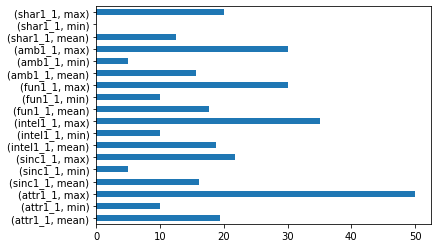

In [148]:
wfm1.iloc[0].plot.barh(y=[['mean']])

In [60]:
males_ = data[data['gender'] == 1]
males_

,iid,id,gender,idg,condtn,wave,Number of people met,station met,start station,order,partner,pid,match,interest level,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,Unnamed: 195
100,11,1.0,1,2,1,1,10,7,NaN,4,1,1.0,0,0.14,0,21.0,4.0,15.0,20.0,20.0,15.0,15.0,15.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,27.0,Finance,8.0,NaN,NaN,NaN,2.0,7.0,3.0,Argentina,0.0,NaN,1.0,5.0,4.0,"Academia, Research, Banking, Life",2,8,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,7.0,3.0,35.0,20.0,20.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.51,17.07,17.07,17.07,12.2,17.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,8.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,35.0,25.0,15.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
101,11,1.0,1,2,1,1,10,3,NaN,10,2,2.0,0,0.29,1,24.0,2.0,45.0,5.0,25.0,20.0,0.0,5.0,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,27.0,Finance,8.0,NaN,NaN,NaN,2.0,7.0,3.0,Argentina,0.0,NaN,1.0,5.0,4.0,"Academia, Research, Banking, Life",2,8,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,7.0,3.0,35.0,20.0,20.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.51,17.07,17.07,17.07,12.2,17.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,8.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,35.0,25.0,15.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
102,11,1.0,1,2,1,1,10,9,NaN,6,3,3.0,0,-0.24,1,25.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,27.0,Finance,8.0,NaN,NaN,NaN,2.0,7.0,3.0,Argentina,0.0,NaN,1.0,5.0,4.0,"Academia, Research, Banking, Life",2,8,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,7.0,3.0,35.0,20.0,20.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5.0,20.0,20.0,25.0,5.0,8.0,9.0,7.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.51,17.07,17.07,17.07,12.2,17.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,8.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,35.0,25.0,15.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
103,11,